# Lab 1 : Online classifiers comparison
- Guillaume Philippe 
- Godefroy Du Chalard 

In [ ]:
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb

Enhance plot and install latex

In [ ]:
!git clone https://github.com/RayleighLord/RayleighLordAnimations.git
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

Cloning into 'RayleighLordAnimations'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 35 (delta 6), reused 17 (delta 2), pack-reused 0
Unpacking objects: 100% (35/35), done.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  cm-super-minimal fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre ghostscript gsfonts javascript-common
  libcupsfilters1 libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0
  libjs-jquery libkpathsea6 libpotrace0 libptexenc1 libruby2.5 libsynctex1
  libtexlua52 libtexluajit2 libzzip-0-13 lmodern pfb2t1c2pfb poppler-data
  preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-n

In [ ]:
try:
  import river
except:
  %pip install river
  import river
try:
  from fig_config import add_grid, figure_features
except:
  %pip install fig_config
  from fig_config import add_grid, figure_features
figure_features()
from river.stream import iter_pandas
from river.preprocessing import StandardScaler
from river import metrics
# https://riverml.xyz/0.13.0/api/tree/HoeffdingTreeClassifier/
from river.tree import HoeffdingTreeClassifier
# https://riverml.xyz/0.13.0/api/naive-bayes/GaussianNB/
from river.naive_bayes import GaussianNB
# https://riverml.xyz/dev/api/ensemble/AdaptiveRandomForestClassifier/
# https://riverml.xyz/0.13.0/api/ensemble/AdaBoostClassifier/
from river.ensemble import AdaptiveRandomForestClassifier, AdaBoostClassifier
# https://riverml.xyz/0.13.0/api/neighbors/KNNClassifier/
from river.neighbors import KNNClassifier

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import os

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 5.3 MB/s 


In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz#
!gzip -dk covtype.data.gz

--2022-12-02 20:07:42--  https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11240707 (11M) [application/x-httpd-php]
Saving to: ‘covtype.data.gz’

covtype.data.gz     100%[===================>]  10.72M  16.3MB/s    in 0.7s    

2022-12-02 20:07:43 (16.3 MB/s) - ‘covtype.data.gz’ saved [11240707/11240707]



# Description of features

| Name | Type   |   Measurement | Description |
|---|---|---|---|
| Elevation   | quantitative   | meters  | Elevation in meters |
|Aspect | quantitative  |azimuth  | Aspect in degrees azimuth | 
|  Slope   |  quantitative|  degrees |  Slope in degrees |
|  Horizontal_Distance_To_Hydrology |  quantitative | meters  |  Horz Dist to nearest surface water features |  
|  Vertical_Distance_To_Hydrology |  quantitative | meters  | Vert Dist to nearest surface water features  |  
| Horizontal_Distance_To_Roadways  | quantitative  | meters  |  Horz Dist to nearest roadway |  
| Hillshade_9am  |   quantitative| 0 to 255   |  Hillshade index at 9am, summer solstice | 
| Hillshade_Noon  |  quantitative | 0 to 255  | Hillshade index at noon, summer soltice  |  
| Hillshade_3pm  |  quantitative | 0 to 255  | Hillshade index at 3pm, summer solstice  |  
| Horizontal_Distance_To_Fire_Points  | quantitative  | meters  | Horz Dist to nearest wildfire ignition points  |  
| Wilderness_Area (4 binary columns)   | quantitative  |  0 (absence) or 1 (presence) | Wilderness area designation  |  
| Soil_Type (40 binary columns)  |  quantitative | 0 (absence) or 1 (presence)  | Soil Type designation  |  
| Cover_Type (7 types)  | quantitative  |  1 to 7 |  Forest Cover Type designation  | 


In [ ]:
names = ["Elevation", "Aspect", "SlopeHorizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points"]
for i in range(4):
  names.append(f"Wilderness_Area_{i}")
for i in range(40):
  names.append(f"Soil_Type_{i}")
names.append("Cover_Type")


df = pd.read_csv("covtype.data", header=None, names=names)
print(df.shape)
df.head()

(581012, 54)


,Elevation,Aspect,SlopeHorizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_0,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
2596,51,3,258,0,510,221,232,148,6279,1,...,0,0,0,0,0,0,0,0,0,5
2590,56,2,212,-6,390,220,235,151,6225,1,...,0,0,0,0,0,0,0,0,0,5
2804,139,9,268,65,3180,234,238,135,6121,1,...,0,0,0,0,0,0,0,0,0,2
2785,155,18,242,118,3090,238,238,122,6211,1,...,0,0,0,0,0,0,0,0,0,2
2595,45,2,153,-1,391,220,234,150,6172,1,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
df["Cover_Type"].unique()

array([5, 2, 1, 7, 3, 6, 4])

We have 7 unique cover types (from 1 to 7 included) 

In [ ]:
label_col = df.columns[-1]
feature_cols = list(df.columns)
feature_cols.pop()  # delete 
X = df[feature_cols]
Y = df[label_col]

In [ ]:
def run_model(model_to_test, n_wait=50000, verbose=True, **kwargs):
  """
  Main function to run prediction and training of one model supervised model from River
  :param model: class of the model in River
  :param verbose: True by default, 
  """
  # Initialize model with *args
  model_to_test = model_to_test(**kwargs)

  results = np.zeros((X.shape[0]//n_wait + 2, 5))

  # Define metrics
  acc = metrics.Accuracy()
  acc_rolling = metrics.Rolling(metric=metrics.Accuracy(), window_size=n_wait)
  kappa = metrics.CohenKappa()
  kappa_rolling = metrics.Rolling(metric=metrics.CohenKappa(), window_size=n_wait)
  for iter, (x, y) in enumerate(iter_pandas(X, Y)):
    # Predict one
    y_pred = model_to_test.predict_one(x)
    # Update metrics
    acc.update(y_true=y, y_pred=y_pred)
    acc_rolling.update(y_true=y, y_pred=y_pred)
    kappa.update(y_true=y, y_pred=y_pred)
    kappa_rolling.update(y_true=y, y_pred=y_pred)
    # Print metrics
    if verbose and (iter % n_wait == 0 or iter == X.shape[0] - 1):
      print("Iteration", iter, "/", acc, "/", acc_rolling ,"/", kappa, "/", kappa_rolling)
      results[iter // n_wait] = [iter, acc.get(), acc_rolling.get(), kappa.get(), kappa_rolling.get()]
    # Learn one
    model_to_test.learn_one(x, y)
  return model_to_test, results

In [ ]:
def plot_results(results):
  global plot_nb
  titles = ["Accuracy", "Rolling Accuracy", "Cohen Kappa", "Rolling Cohen Kappa"]
  fig, axs = plt.subplots(2, 2, figsize=(16, 10))
  for i in range(0,4):
    x = i//2
    y = i%2
    add_grid(axs[x, y])
    axs[x, y].set_title(titles[i])
    axs[x, y].set_xlim(0, 600000)
    axs[x, y].set_ylim(0, 1)
    axs[x, y].set_xlabel("Iterations")
    axs[x, y].set_ylabel(titles[i])
    axs[x, y].plot(results[:, 0], results[:, i+1], marker="+")
  plt.show()

# 1. KNNClassifier

In [ ]:
knn, knn_res = run_model(KNNClassifier)

Iteration 0 / Accuracy: 0.00% / Accuracy: 0.00%	(rolling 50000) / CohenKappa: 0.00% / CohenKappa: 0.00%	(rolling 50000)
Iteration 50000 / Accuracy: 89.23% / Accuracy: 89.23%	(rolling 50000) / CohenKappa: 82.67% / CohenKappa: 82.67%	(rolling 50000)
Iteration 100000 / Accuracy: 93.04% / Accuracy: 96.84%	(rolling 50000) / CohenKappa: 86.21% / CohenKappa: 91.36%	(rolling 50000)
Iteration 150000 / Accuracy: 94.25% / Accuracy: 96.69%	(rolling 50000) / CohenKappa: 87.43% / CohenKappa: 90.58%	(rolling 50000)
Iteration 200000 / Accuracy: 94.71% / Accuracy: 96.09%	(rolling 50000) / CohenKappa: 89.14% / CohenKappa: 92.34%	(rolling 50000)
Iteration 250000 / Accuracy: 94.94% / Accuracy: 95.84%	(rolling 50000) / CohenKappa: 90.38% / CohenKappa: 93.61%	(rolling 50000)
Iteration 300000 / Accuracy: 95.07% / Accuracy: 95.74%	(rolling 50000) / CohenKappa: 91.64% / CohenKappa: 94.33%	(rolling 50000)
Iteration 350000 / Accuracy: 95.16% / Accuracy: 95.68%	(rolling 50000) / CohenKappa: 91.88% / CohenKappa: 9

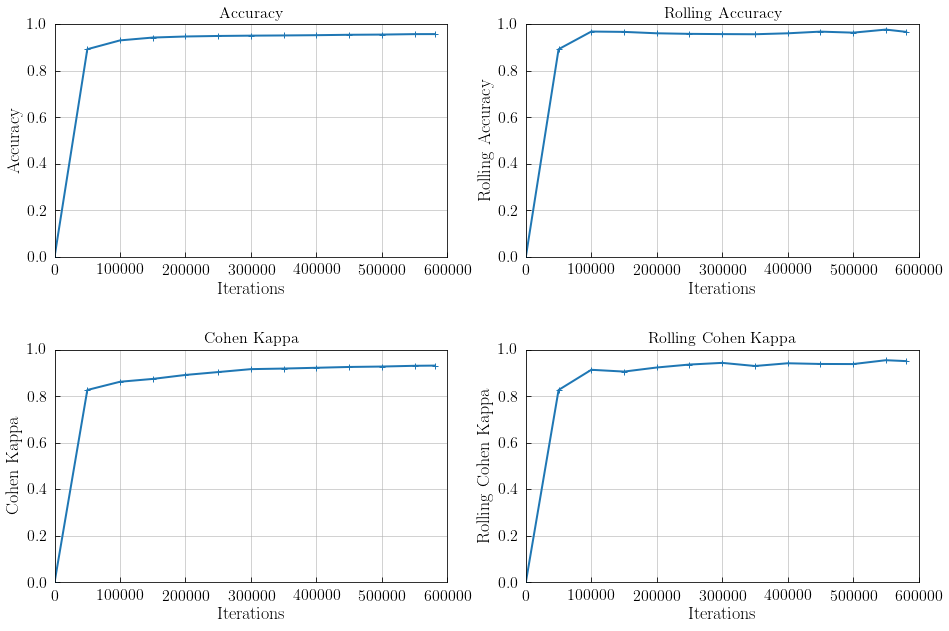

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_results(knn_res)

# 2. Naive Bayes

In [ ]:
gnb, gnb_res = run_model(GaussianNB)

Iteration 0 / Accuracy: 0.00% / Accuracy: 0.00%	(rolling 50000) / CohenKappa: 0.00% / CohenKappa: 0.00%	(rolling 50000)
Iteration 50000 / Accuracy: 57.64% / Accuracy: 57.65%	(rolling 50000) / CohenKappa: 0.66% / CohenKappa: 0.66%	(rolling 50000)
Iteration 100000 / Accuracy: 66.78% / Accuracy: 75.91%	(rolling 50000) / CohenKappa: 0.49% / CohenKappa: 0.00%	(rolling 50000)
Iteration 150000 / Accuracy: 70.33% / Accuracy: 77.44%	(rolling 50000) / CohenKappa: 0.39% / CohenKappa: 0.00%	(rolling 50000)
Iteration 200000 / Accuracy: 66.00% / Accuracy: 53.00%	(rolling 50000) / CohenKappa: 0.22% / CohenKappa: 0.00%	(rolling 50000)
Iteration 250000 / Accuracy: 62.41% / Accuracy: 48.04%	(rolling 50000) / CohenKappa: 0.15% / CohenKappa: 0.00%	(rolling 50000)
Iteration 300000 / Accuracy: 57.08% / Accuracy: 30.47%	(rolling 50000) / CohenKappa: 0.10% / CohenKappa: 0.00%	(rolling 50000)
Iteration 350000 / Accuracy: 55.58% / Accuracy: 46.56%	(rolling 50000) / CohenKappa: 0.08% / CohenKappa: 0.00%	(rolling

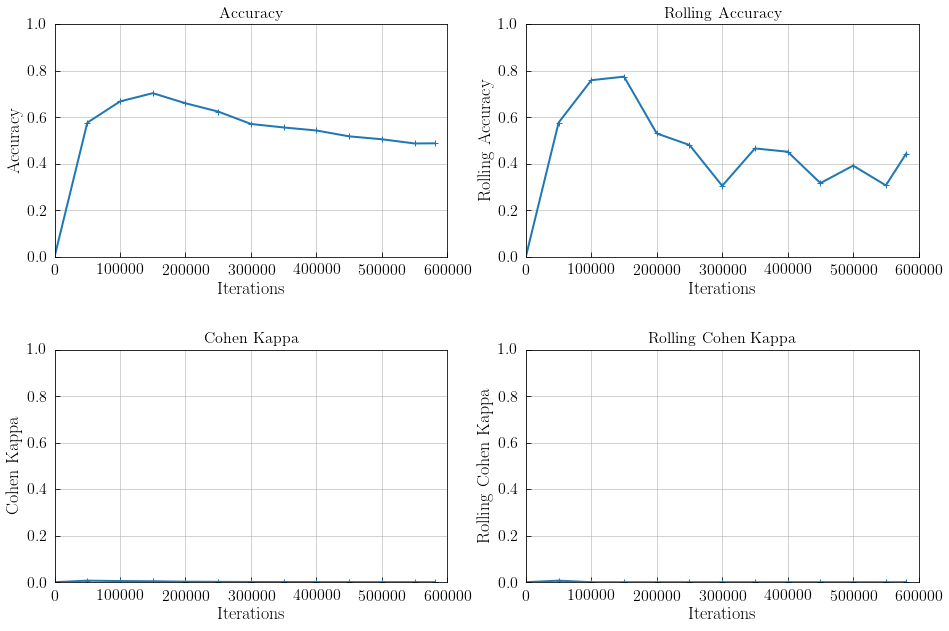

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_results(gnb_res)

# 3. HoeffdingTreeClassifier

In [ ]:
ht, ht_res = run_model(HoeffdingTreeClassifier, max_depth=7, grace_period=2000)

Iteration 0 / Accuracy: 0.00% / Accuracy: 0.00%	(rolling 50000) / CohenKappa: 0.00% / CohenKappa: 0.00%	(rolling 50000)
Iteration 50000 / Accuracy: 68.30% / Accuracy: 68.30%	(rolling 50000) / CohenKappa: 43.45% / CohenKappa: 43.45%	(rolling 50000)
Iteration 100000 / Accuracy: 71.60% / Accuracy: 74.89%	(rolling 50000) / CohenKappa: 39.77% / CohenKappa: 32.69%	(rolling 50000)
Iteration 150000 / Accuracy: 74.46% / Accuracy: 80.19%	(rolling 50000) / CohenKappa: 39.54% / CohenKappa: 37.05%	(rolling 50000)
Iteration 200000 / Accuracy: 69.56% / Accuracy: 54.86%	(rolling 50000) / CohenKappa: 28.77% / CohenKappa: 5.36%	(rolling 50000)
Iteration 250000 / Accuracy: 66.50% / Accuracy: 54.28%	(rolling 50000) / CohenKappa: 26.84% / CohenKappa: 21.51%	(rolling 50000)
Iteration 300000 / Accuracy: 67.55% / Accuracy: 72.81%	(rolling 50000) / CohenKappa: 39.15% / CohenKappa: 62.38%	(rolling 50000)
Iteration 350000 / Accuracy: 65.42% / Accuracy: 52.60%	(rolling 50000) / CohenKappa: 35.77% / CohenKappa: 18

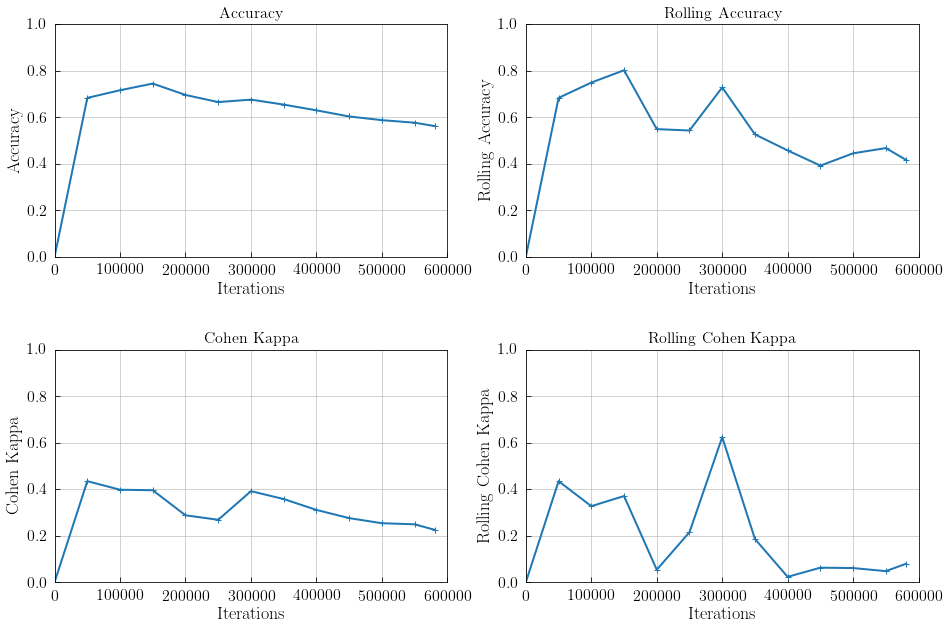

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_results(ht_res)

In [ ]:
ht.summary

{'n_nodes': 59,
 'n_branches': 29,
 'n_leaves': 30,
 'n_active_leaves': 15,
 'n_inactive_leaves': 15,
 'height': 8,
 'total_observed_weight': 581012.0}

# 4. AdaptiveRandomForestClassifier

In [ ]:
rf, rf_res = run_model(AdaptiveRandomForestClassifier, max_features="log2", n_models=5)

Iteration 0 / Accuracy: 0.00% / Accuracy: 0.00%	(rolling 50000) / CohenKappa: 0.00% / CohenKappa: 0.00%	(rolling 50000)
Iteration 50000 / Accuracy: 81.71% / Accuracy: 81.71%	(rolling 50000) / CohenKappa: 69.51% / CohenKappa: 69.51%	(rolling 50000)
Iteration 100000 / Accuracy: 83.89% / Accuracy: 86.07%	(rolling 50000) / CohenKappa: 65.84% / CohenKappa: 56.13%	(rolling 50000)
Iteration 150000 / Accuracy: 84.65% / Accuracy: 86.17%	(rolling 50000) / CohenKappa: 63.19% / CohenKappa: 53.39%	(rolling 50000)
Iteration 200000 / Accuracy: 83.87% / Accuracy: 81.54%	(rolling 50000) / CohenKappa: 64.95% / CohenKappa: 63.48%	(rolling 50000)
Iteration 250000 / Accuracy: 83.15% / Accuracy: 80.26%	(rolling 50000) / CohenKappa: 66.40% / CohenKappa: 68.60%	(rolling 50000)
Iteration 300000 / Accuracy: 81.88% / Accuracy: 75.54%	(rolling 50000) / CohenKappa: 68.11% / CohenKappa: 66.86%	(rolling 50000)
Iteration 350000 / Accuracy: 81.15% / Accuracy: 76.77%	(rolling 50000) / CohenKappa: 67.30% / CohenKappa: 6

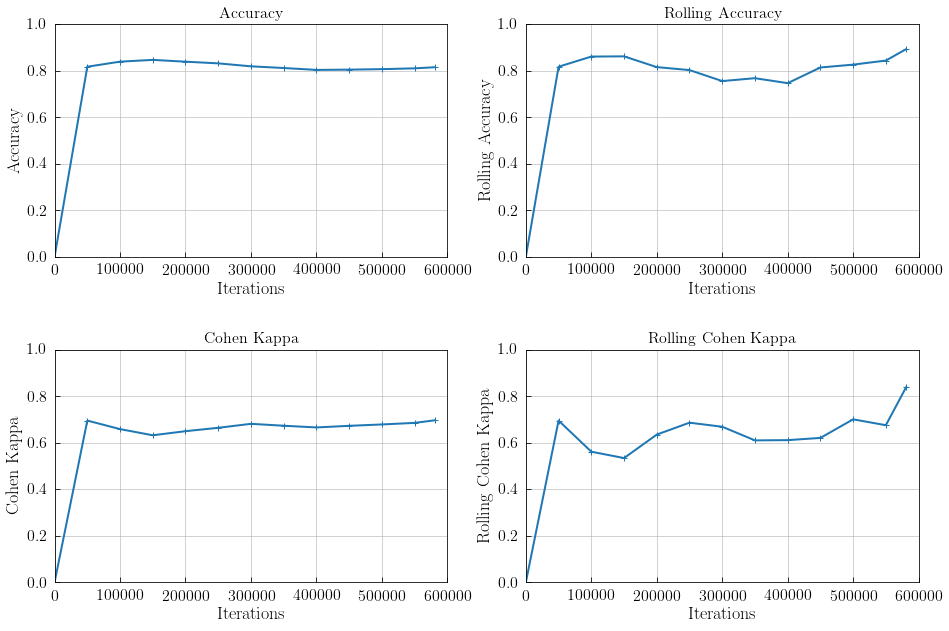

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_results(rf_res)  

# 5. AdaBoostClassifier

In [ ]:
tree=(
  HoeffdingTreeClassifier(
      split_criterion='gini', 
      grace_period=2000,
      max_depth=7
    )
  )
ada, res_ada = run_model(AdaBoostClassifier, model=tree, n_models=5)

Iteration 0 / Accuracy: 0.00% / Accuracy: 0.00%	(rolling 50000) / CohenKappa: 0.00% / CohenKappa: 0.00%	(rolling 50000)
Iteration 50000 / Accuracy: 66.55% / Accuracy: 66.55%	(rolling 50000) / CohenKappa: 41.35% / CohenKappa: 41.35%	(rolling 50000)
Iteration 100000 / Accuracy: 71.77% / Accuracy: 76.99%	(rolling 50000) / CohenKappa: 34.91% / CohenKappa: 14.95%	(rolling 50000)
Iteration 150000 / Accuracy: 73.62% / Accuracy: 77.33%	(rolling 50000) / CohenKappa: 29.24% / CohenKappa: 4.79%	(rolling 50000)
Iteration 200000 / Accuracy: 70.27% / Accuracy: 60.21%	(rolling 50000) / CohenKappa: 26.68% / CohenKappa: 17.42%	(rolling 50000)
Iteration 250000 / Accuracy: 70.04% / Accuracy: 69.11%	(rolling 50000) / CohenKappa: 33.04% / CohenKappa: 47.57%	(rolling 50000)
Iteration 300000 / Accuracy: 69.50% / Accuracy: 66.83%	(rolling 50000) / CohenKappa: 41.56% / CohenKappa: 53.67%	(rolling 50000)
Iteration 350000 / Accuracy: 68.69% / Accuracy: 63.82%	(rolling 50000) / CohenKappa: 41.53% / CohenKappa: 39

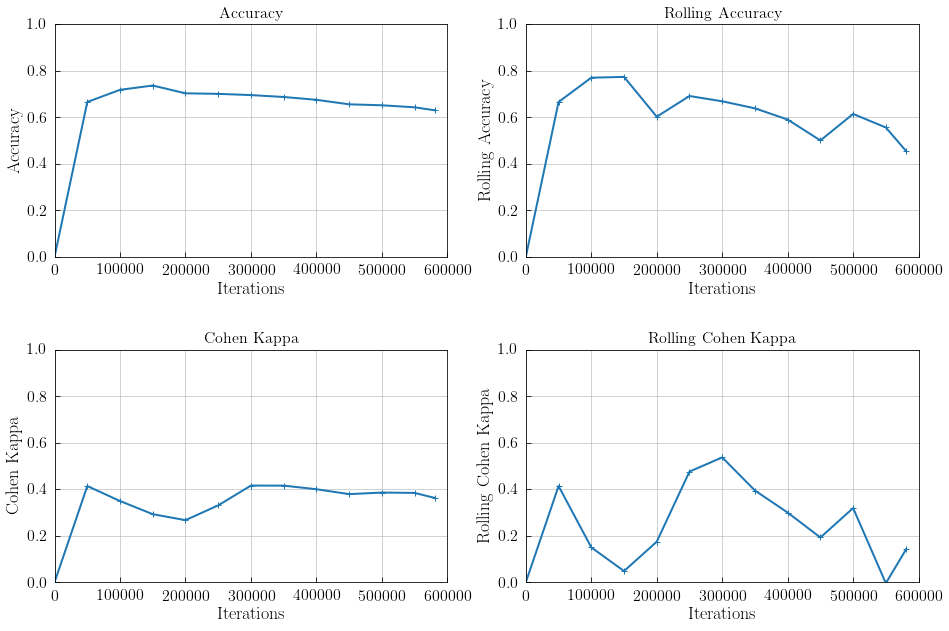

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_results(res_ada)